In [358]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [359]:
class Coalescent:
    def __init__(self, rng, n):
        self.n = n
        self.t = np.zeros(n+1)
        self.t[0] = self.t[1] = math.inf
        for k in range(2, n+1):
            self.t[k] = rng.exponential(scale=2/(k*(k-1)))
        self.height = sum(self.t[2:])
        self.len = sum([k * self.t[k] for k in range(2, n+1)])
        self.x = np.zeros(n)
        self.y = np.zeros(n)
        for i in range(1, n):
            m = n + 1 - i
            self.x[i] = self.x[i-1] + self.t[m]
            self.y[i] = self.y[i-1] + self.t[m] * m

    def plot(self, ax=plt):
        ax.plot(self.x, self.y)

    def branch_length(self, t):
        return np.interp(t, self.x, self.y, left=0, right=self.len)



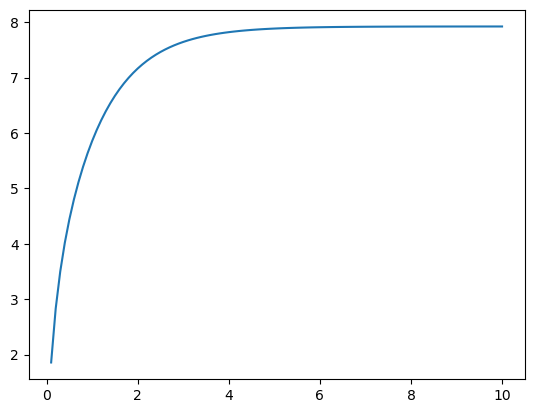

In [422]:
def hypoexponential(n):
    eta = np.array([k * (k-1) / 2 for k in range(n+1)])
    eta[1] = math.inf
    coeffs = np.zeros(n+1)
    for k in range(1, n+1):
        for i in range(1, k+1):
            p = 1.0
            for j in range(i, n+1):
                if j == k:
                    continue
                p *= 1 / (1 - eta[k] / eta[j])
            coeffs[k] += p
    return eta, coeffs
n = 30
eta, coeffs = hypoexponential(n)

# plot t |-> coeffs[k] * exp(-eta[k] * t)
t = np.linspace(0.1, 10, 100)
f = np.zeros_like(t)
for k in range(1, n+1):
    f += coeffs[k] * (1 - np.exp(-eta[k] * t)) / eta[k]

plt.plot(t, f)

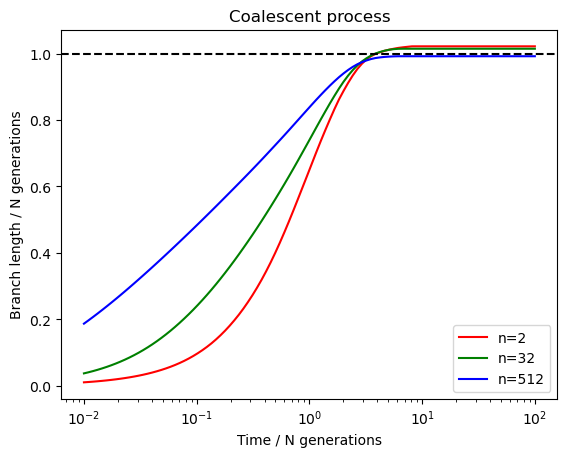

In [360]:
rng = np.random.default_rng(seed=0)
times = np.logspace(-2, 2, 100)
reps = 1000

def plot_coalescent_law(n, reps, label, color):
    coalescents = [Coalescent(rng, n) for _ in range(reps)]
    branch_lengths = np.array([c.branch_length(times) for c in coalescents])
    mean_branch_lengths = np.mean(branch_lengths, axis=0)
    std_branch_lengths = np.std(branch_lengths, axis=0)

    expected_final_branch_length = 2 * sum([1/k for k in range(1, n)])

    scaled_means = mean_branch_lengths / expected_final_branch_length
    scaled_stds = std_branch_lengths / expected_final_branch_length

    plt.plot(times, scaled_means, label=label, color=color)
    # plt.fill_between(times, scaled_means - scaled_stds, scaled_means + scaled_stds, color=color, alpha=0.2)


ns = [2, 32, 512]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
for n, color in zip(ns, colors):
    plot_coalescent_law(n, reps, f'n={n}', color)
plt.title('Coalescent process')
plt.xlabel('Time / N generations')
plt.ylabel('Branch length / N generations')
# horizontal line at 1
plt.axhline(1, color='black', linestyle='--')
plt.xscale('log')
plt.legend()

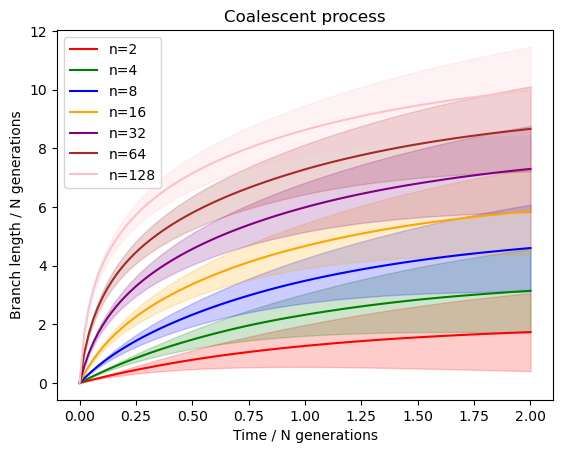

In [361]:
rng = np.random.default_rng(seed=1)
times = np.linspace(0, 2, 100)
reps = 1000

def plot_coalescent_law(n, reps, label, color):
    coalescents = [Coalescent(rng, n) for _ in range(reps)]
    branch_lengths = np.array([c.branch_length(times) for c in coalescents])
    mean_branch_lengths = np.mean(branch_lengths, axis=0)
    std_branch_lengths = np.std(branch_lengths, axis=0)

    plt.plot(times, mean_branch_lengths, label=label, color=color)
    plt.fill_between(times, mean_branch_lengths-std_branch_lengths, mean_branch_lengths+std_branch_lengths, alpha=0.2, color=color)

ns = [2, 4, 8, 16, 32, 64, 128]
colors = ['red', 'green', 'blue', 'orange', 'purple', 'brown', 'pink']
for n, color in zip(ns, colors):
    plot_coalescent_law(n, reps, f'n={n}', color)
plt.title('Coalescent process')
plt.xlabel('Time / N generations')
plt.ylabel('Branch length / N generations')
plt.legend()

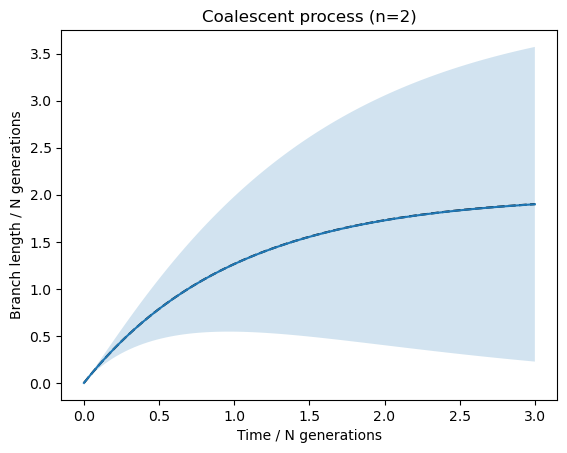

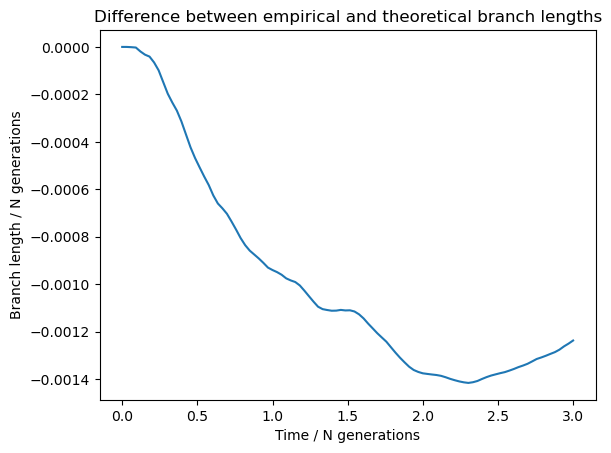

In [448]:
rng = np.random.default_rng(seed=0)
n = 2
times = np.linspace(0, 3, 100)
reps = 1000000

coalescents = [Coalescent(rng, n) for _ in range(reps)]
branch_lengths = np.array([c.branch_length(times) for c in coalescents])
mean_branch_lengths = np.mean(branch_lengths, axis=0)
std_branch_lengths = np.std(branch_lengths, axis=0)

eta, coeffs = hypoexponential(n)
# plot t |-> coeffs[k] * exp(-eta[k] * t)
f = np.zeros_like(times)
for k in range(2, n+1):
    f += coeffs[k] * (1 - np.exp(-eta[k] * times)) / eta[k]

plt.plot(times, f, label='Hypoexponential', color='black', linestyle='--')

plt.title('Coalescent process' + f' (n={n})')
plt.xlabel('Time / N generations')
plt.ylabel('Branch length / N generations')
plt.plot(times, mean_branch_lengths)
plt.fill_between(times, mean_branch_lengths-std_branch_lengths, mean_branch_lengths+std_branch_lengths, alpha=0.2)
plt.show()

# plot difference between empirical and theoretical
plt.plot(times, mean_branch_lengths - f)
plt.title('Difference between empirical and theoretical branch lengths')
plt.xlabel('Time / N generations')
plt.ylabel('Branch length / N generations')
plt.show()

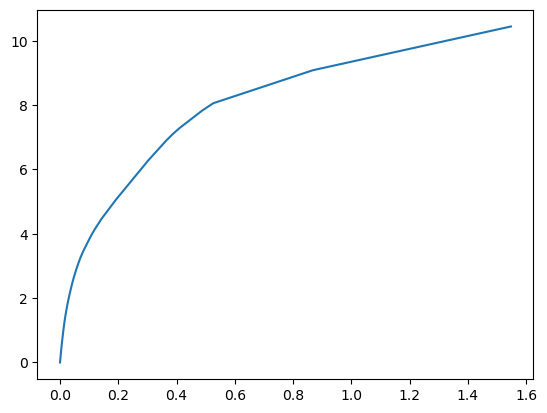

In [363]:
rng = np.random.default_rng(seed=0)
n = 100
c = Coalescent(rng, n)
c.plot()

In [364]:
rng = np.random.default_rng()
n = 100

mean_height = 0
mean_len = 0
num_samples = 1000
for i in range(num_samples):
    c = Coalescent(rng, n)
    mean_height += c.height
    mean_len += c.len
mean_height /= num_samples
mean_len /= num_samples

print(mean_height, mean_len)

1.9821701116705033 10.379633808677582


In [365]:
expected_height = 2 * (1 - 1/n)
expected_len = 2 * sum([1/k for k in range(1, n)])

print(expected_height, expected_len)

1.98 10.35475503527924
